## Milestone 1: Data Foundation and Cleaning
### Week 1: Project Initialization and Dataset Setup

#### Define goals, KPIs, and workflow
#### Load datasets with pandas
#### Explore schema, types, size, and nulls
#### Perform sampling and memory optimizations

dataset used : [kaggle/dataset](https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023/data?select=flights_sample_3m.csv)

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd


In [2]:
# Loading the dataset 
df = pd.read_csv(r"flights_sample_3m.csv")

Exploring the dataset

In [3]:
print("printing top 5 rows ")
df.head()

printing top 5 rows 


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print("printing last 5 rows \n")
df.tail()

printing last 5 rows 



,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN
2999999,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2823,LGB,"Long Beach, CA",SJC,"San Jose, CA",...,0.0,70.0,63.0,52.0,324.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [6]:
# Check dimension of dataset
df.shape
print("There are "+ str(df.shape[0]) +" rows and "+ str(df.shape[1]) +" columns from the flight dataset.")

There are 3000000 rows and 32 columns from the flight dataset.


In [7]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

Calculating the proportion of missing data in the dataset

In [8]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(df)

Proportion of missing data in columns
                column_name  percentage
0         CANCELLATION_CODE   97.362000
1         DELAY_DUE_WEATHER   82.204567
2             DELAY_DUE_NAS   82.204567
3        DELAY_DUE_SECURITY   82.204567
4   DELAY_DUE_LATE_AIRCRAFT   82.204567
5         DELAY_DUE_CARRIER   82.204567
6                  AIR_TIME    2.873267
7              ELAPSED_TIME    2.873267
8                 ARR_DELAY    2.873267
9                   TAXI_IN    2.664800
10                WHEELS_ON    2.664800
11                 ARR_TIME    2.664733
12                 TAXI_OUT    2.626867
13               WHEELS_OFF    2.626867
14                DEP_DELAY    2.588133
15                 DEP_TIME    2.587167
16         CRS_ELAPSED_TIME    0.000467


Cleaning the dataset by replacing the NaN, Null values with 0

In [9]:
# Cleaning the dataset

print("Cleaning data...")


# --- Handle Nulls & Outliers ---
delay_cols = ['DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER', 
              'DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY',
              'DELAY_DUE_LATE_AIRCRAFT']
for col in delay_cols:
    df[col] = df[col].fillna(0)


Cleaning data...


In [10]:
# Drop unnecessary columns
df = df.drop(columns=['AIRLINE_DOT', 'DOT_CODE', 'FL_NUMBER'])

In [11]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
FL_DATE                          0
AIRLINE                          0
AIRLINE_CODE                     0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                        0
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                        0
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER                0
DELAY_DUE_WEATHER                0
DELAY_DUE_NAS                    0
DELAY_DUE_SECURITY               0
DEL

In [12]:
# ---Convert numeric columns to smaller float types for memory efficiency
numeric_cols = ['DEP_DELAY', 'ARR_DELAY', 'TAXI_OUT', 'TAXI_IN', 
                'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
                'DELAY_DUE_CARRIER','DELAY_DUE_WEATHER','DELAY_DUE_NAS',
                'DELAY_DUE_SECURITY','DELAY_DUE_LATE_AIRCRAFT']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], downcast='float')

In [13]:
# --- Convert to Appropriate Types ---
categorical_cols = ['AIRLINE', 'AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY',
                    'DEST', 'DEST_CITY', 'CANCELLATION_CODE']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [14]:
# --- Handle Nulls & Outliers ---
delay_cols = ['DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER', 
              'DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY',
              'DELAY_DUE_LATE_AIRCRAFT']
for col in delay_cols:
    df[col] = df[col].fillna(0)

Making new two delay columns 

In [15]:
# Function to return the main delay cause and its minutes for each row
def get_delay_reason_and_time(row):
    if row['DELAY_DUE_CARRIER'] > 0:
        return "CARRIER", int(row['DELAY_DUE_CARRIER'])
    elif row['DELAY_DUE_WEATHER'] > 0:
        return "WEATHER", int(row['DELAY_DUE_WEATHER'])
    elif row['DELAY_DUE_NAS'] > 0:
        return "NAS", int(row['DELAY_DUE_NAS'])
    elif row['DELAY_DUE_SECURITY'] > 0:
        return "SECURITY", int(row['DELAY_DUE_SECURITY'])
    elif row['DELAY_DUE_LATE_AIRCRAFT'] > 0:
        return "LATE_AIRCRAFT", int(row['DELAY_DUE_LATE_AIRCRAFT'])
    else:
        return "NO_DELAY", 0


In [16]:
# Apply the function row-wise and create two new columns: DELAY_CAUSE & DELAY_MINUTES
df[['DELAY_CAUSE', 'DELAY_MINUTES']] = df.apply(get_delay_reason_and_time, axis=1, result_type='expand')

In [17]:
delay_cols = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# Drop in place
df.drop(columns=delay_cols, inplace=True)

In [18]:
df.head().columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST',
       'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_CAUSE', 'DELAY_MINUTES'],
      dtype='object')

COnverting the Flight Date into date time for creating more indiviual columns for further use

In [19]:
# --- Datetime Conversion ---
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

In [20]:


# Convert to datetime, then extract only the time (HH:MM, no seconds)
df['departure_time'] = pd.to_datetime(
    df['DEP_TIME'].fillna(0).astype(int).astype(str).str.zfill(4),
    format='%H%M',
    errors='coerce'
).dt.time

df['arrival_time'] = pd.to_datetime(
    df['ARR_TIME'].fillna(0).astype(int).astype(str).str.zfill(4),
    format='%H%M',
    errors='coerce'
).dt.time

In [21]:
# Creating a month column
df['Month'] = df['FL_DATE'].dt.month

In [22]:
df.head()


,FL_DATE,AIRLINE,AIRLINE_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_CAUSE,DELAY_MINUTES,departure_time,arrival_time,Month
0,2019-01-09,United Air Lines Inc.,UA,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,...,0.0,186.0,176.0,153.0,1065.0,NO_DELAY,0,11:51:00,14:47:00,1
1,2022-11-19,Delta Air Lines Inc.,DL,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,...,0.0,235.0,236.0,189.0,1399.0,NO_DELAY,0,21:14:00,23:10:00,11
2,2022-07-22,United Air Lines Inc.,UA,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,...,0.0,118.0,112.0,87.0,680.0,NO_DELAY,0,10:00:00,12:52:00,7
3,2023-03-06,Delta Air Lines Inc.,DL,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,...,0.0,260.0,285.0,249.0,1589.0,NAS,24,16:08:00,18:53:00,3
4,2020-02-23,Spirit Air Lines,NK,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,...,0.0,181.0,182.0,153.0,985.0,NO_DELAY,0,18:38:00,20:40:00,2


In [23]:
# Replacing numerical values with suitable abbreviation
import calendar

# Replace numeric month with abbreviation in the same column
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])


In [24]:
df

,FL_DATE,AIRLINE,AIRLINE_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_CAUSE,DELAY_MINUTES,departure_time,arrival_time,Month
0,2019-01-09,United Air Lines Inc.,UA,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,...,0.0,186.0,176.0,153.0,1065.0,NO_DELAY,0,11:51:00,14:47:00,Jan
1,2022-11-19,Delta Air Lines Inc.,DL,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,...,0.0,235.0,236.0,189.0,1399.0,NO_DELAY,0,21:14:00,23:10:00,Nov
2,2022-07-22,United Air Lines Inc.,UA,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,...,0.0,118.0,112.0,87.0,680.0,NO_DELAY,0,10:00:00,12:52:00,Jul
3,2023-03-06,Delta Air Lines Inc.,DL,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,...,0.0,260.0,285.0,249.0,1589.0,NAS,24,16:08:00,18:53:00,Mar
4,2020-02-23,Spirit Air Lines,NK,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,...,0.0,181.0,182.0,153.0,985.0,NO_DELAY,0,18:38:00,20:40:00,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,AA,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,...,0.0,85.0,71.0,55.0,328.0,NO_DELAY,0,17:40:00,18:51:00,Nov
2999996,2022-11-02,American Airlines Inc.,AA,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,...,0.0,176.0,145.0,130.0,977.0,NO_DELAY,0,12:54:00,15:19:00,Nov
2999997,2022-09-11,Delta Air Lines Inc.,DL,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,...,0.0,55.0,50.0,28.0,151.0,WEATHER,36,06:15:00,08:05:00,Sep
2999998,2019-11-13,Republic Airline,YX,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,...,0.0,88.0,77.0,50.0,184.0,NO_DELAY,0,15:55:00,17:12:00,Nov


Calculating delay percentage for each delay type

In [25]:
# Calculating the delay percentage 
# Group by cause and sum delay minutes
DELAY_CAUSE = df.groupby('DELAY_CAUSE')['DELAY_MINUTES'].sum().reset_index()

# Convert minutes → hours
DELAY_CAUSE['DELAY_HOURS'] = DELAY_CAUSE['DELAY_MINUTES'] / 60  

# Calculate percentage contribution based on hours
TOTAL_DELAY = DELAY_CAUSE['DELAY_HOURS'].sum()
DELAY_CAUSE['DELAY_PERCENT'] = (DELAY_CAUSE['DELAY_HOURS'] / TOTAL_DELAY) * 100

# Keep only useful columns
DELAY_CAUSE = DELAY_CAUSE[['DELAY_CAUSE', 'DELAY_HOURS', 'DELAY_PERCENT']].round(3)

print(DELAY_CAUSE)


     DELAY_CAUSE  DELAY_HOURS  DELAY_PERCENT
0        CARRIER   220299.333         52.831
1  LATE_AIRCRAFT    77466.317         18.578
2            NAS    84103.050         20.169
3       NO_DELAY        0.000          0.000
4       SECURITY      771.567          0.185
5        WEATHER    34347.600          8.237


In [26]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST',
       'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_CAUSE', 'DELAY_MINUTES', 'departure_time', 'arrival_time',
       'Month'],
      dtype='object')

In [27]:
df.shape

(3000000, 29)

Adding another Column called Route 

In [28]:
# Adding ROUTE for easy viewing
# Add ROUTE and ROUTE_CITY to the main df
df['ROUTE'] = df['ORIGIN'].astype(str) + " - " + df['DEST'].astype(str)
df['ROUTE_CITY'] = df['ORIGIN_CITY'].astype(str) + " - " + df['DEST_CITY'].astype(str)

# Create separate route dataframe
route = df[['ROUTE', 'ROUTE_CITY']].copy()

print("Updated main df with ROUTE columns:")
print(df[['ORIGIN','DEST','ROUTE','ROUTE_CITY']].head())



Updated main df with ROUTE columns:
  ORIGIN DEST      ROUTE                           ROUTE_CITY
0    FLL  EWR  FLL - EWR     Fort Lauderdale, FL - Newark, NJ
1    MSP  SEA  MSP - SEA        Minneapolis, MN - Seattle, WA
2    DEN  MSP  DEN - MSP         Denver, CO - Minneapolis, MN
3    MSP  SFO  MSP - SFO  Minneapolis, MN - San Francisco, CA
4    MCO  DFW  MCO - DFW  Orlando, FL - Dallas/Fort Worth, TX


In [29]:
df

,FL_DATE,AIRLINE,AIRLINE_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_CAUSE,DELAY_MINUTES,departure_time,arrival_time,Month,ROUTE,ROUTE_CITY
0,2019-01-09,United Air Lines Inc.,UA,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,...,176.0,153.0,1065.0,NO_DELAY,0,11:51:00,14:47:00,Jan,FLL - EWR,"Fort Lauderdale, FL - Newark, NJ"
1,2022-11-19,Delta Air Lines Inc.,DL,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,...,236.0,189.0,1399.0,NO_DELAY,0,21:14:00,23:10:00,Nov,MSP - SEA,"Minneapolis, MN - Seattle, WA"
2,2022-07-22,United Air Lines Inc.,UA,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,...,112.0,87.0,680.0,NO_DELAY,0,10:00:00,12:52:00,Jul,DEN - MSP,"Denver, CO - Minneapolis, MN"
3,2023-03-06,Delta Air Lines Inc.,DL,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,...,285.0,249.0,1589.0,NAS,24,16:08:00,18:53:00,Mar,MSP - SFO,"Minneapolis, MN - San Francisco, CA"
4,2020-02-23,Spirit Air Lines,NK,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,...,182.0,153.0,985.0,NO_DELAY,0,18:38:00,20:40:00,Feb,MCO - DFW,"Orlando, FL - Dallas/Fort Worth, TX"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,AA,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,...,71.0,55.0,328.0,NO_DELAY,0,17:40:00,18:51:00,Nov,JAX - CLT,"Jacksonville, FL - Charlotte, NC"
2999996,2022-11-02,American Airlines Inc.,AA,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,...,145.0,130.0,977.0,NO_DELAY,0,12:54:00,15:19:00,Nov,ORD - AUS,"Chicago, IL - Austin, TX"
2999997,2022-09-11,Delta Air Lines Inc.,DL,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,...,50.0,28.0,151.0,WEATHER,36,06:15:00,08:05:00,Sep,HSV - ATL,"Huntsville, AL - Atlanta, GA"
2999998,2019-11-13,Republic Airline,YX,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,...,77.0,50.0,184.0,NO_DELAY,0,15:55:00,17:12:00,Nov,BOS - LGA,"Boston, MA - New York, NY"


Checking the missing values after removing null values and optimizing it.


In [30]:
def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(df)

Proportion of missing data in columns
          column_name  percentage
0   CANCELLATION_CODE   97.362000
1        ELAPSED_TIME    2.873267
2            AIR_TIME    2.873267
3           WHEELS_ON    2.664800
4             TAXI_IN    2.664800
5            ARR_TIME    2.664733
6            TAXI_OUT    2.626867
7          WHEELS_OFF    2.626867
8            DEP_TIME    2.587167
9        arrival_time    0.047200
10     departure_time    0.008067
11   CRS_ELAPSED_TIME    0.000467


Removed Cancellation code column as it had a very hude proportion of missing values in it and is not much important 

In [31]:
# removing cancellation code column to reduce the data redundacy
df = df.drop(columns=['CANCELLATION_CODE'])

In [32]:
route

,ROUTE,ROUTE_CITY
0,FLL - EWR,"Fort Lauderdale, FL - Newark, NJ"
1,MSP - SEA,"Minneapolis, MN - Seattle, WA"
2,DEN - MSP,"Denver, CO - Minneapolis, MN"
3,MSP - SFO,"Minneapolis, MN - San Francisco, CA"
4,MCO - DFW,"Orlando, FL - Dallas/Fort Worth, TX"
...,...,...
2999995,JAX - CLT,"Jacksonville, FL - Charlotte, NC"
2999996,ORD - AUS,"Chicago, IL - Austin, TX"
2999997,HSV - ATL,"Huntsville, AL - Atlanta, GA"
2999998,BOS - LGA,"Boston, MA - New York, NY"


In [33]:
pd.set_option('display.max_columns', 29)
df

,FL_DATE,AIRLINE,AIRLINE_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_CAUSE,DELAY_MINUTES,departure_time,arrival_time,Month,ROUTE,ROUTE_CITY
0,2019-01-09,United Air Lines Inc.,UA,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,...,-14.0,0.0,0.0,186.0,176.0,153.0,1065.0,NO_DELAY,0,11:51:00,14:47:00,Jan,FLL - EWR,"Fort Lauderdale, FL - Newark, NJ"
1,2022-11-19,Delta Air Lines Inc.,DL,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,...,-5.0,0.0,0.0,235.0,236.0,189.0,1399.0,NO_DELAY,0,21:14:00,23:10:00,Nov,MSP - SEA,"Minneapolis, MN - Seattle, WA"
2,2022-07-22,United Air Lines Inc.,UA,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,...,0.0,0.0,0.0,118.0,112.0,87.0,680.0,NO_DELAY,0,10:00:00,12:52:00,Jul,DEN - MSP,"Denver, CO - Minneapolis, MN"
3,2023-03-06,Delta Air Lines Inc.,DL,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,...,24.0,0.0,0.0,260.0,285.0,249.0,1589.0,NAS,24,16:08:00,18:53:00,Mar,MSP - SFO,"Minneapolis, MN - San Francisco, CA"
4,2020-02-23,Spirit Air Lines,NK,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,...,-1.0,0.0,0.0,181.0,182.0,153.0,985.0,NO_DELAY,0,18:38:00,20:40:00,Feb,MCO - DFW,"Orlando, FL - Dallas/Fort Worth, TX"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,AA,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,...,-16.0,0.0,0.0,85.0,71.0,55.0,328.0,NO_DELAY,0,17:40:00,18:51:00,Nov,JAX - CLT,"Jacksonville, FL - Charlotte, NC"
2999996,2022-11-02,American Airlines Inc.,AA,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,...,-37.0,0.0,0.0,176.0,145.0,130.0,977.0,NO_DELAY,0,12:54:00,15:19:00,Nov,ORD - AUS,"Chicago, IL - Austin, TX"
2999997,2022-09-11,Delta Air Lines Inc.,DL,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,...,36.0,0.0,0.0,55.0,50.0,28.0,151.0,WEATHER,36,06:15:00,08:05:00,Sep,HSV - ATL,"Huntsville, AL - Atlanta, GA"
2999998,2019-11-13,Republic Airline,YX,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,19.0,1614.0,1704.0,8.0,...,-16.0,0.0,0.0,88.0,77.0,50.0,184.0,NO_DELAY,0,15:55:00,17:12:00,Nov,BOS - LGA,"Boston, MA - New York, NY"


In [34]:
!pip install pyarrow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!pip install fastparquet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST',
       'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_CAUSE', 'DELAY_MINUTES',
       'departure_time', 'arrival_time', 'Month', 'ROUTE', 'ROUTE_CITY'],
      dtype='object')

In [37]:
df.to_parquet("cleaned_dataset.parquet")

In [38]:
redefined_df = pd.read_parquet('cleaned_dataset.parquet',  columns = ['FL_DATE','AIRLINE', 'AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST',
       'DEST_CITY', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_CAUSE', 'DELAY_MINUTES',
       'departure_time', 'arrival_time', 'Month', 'ROUTE', 'ROUTE_CITY' ])

In [57]:
cleaned_dataset = pd.DataFrame(redefined_df)
df.to_csv(r"C:\Users\sreek\Data Science Course\Infosys\cleaned_dataset1.csv", index=False)

In [40]:
# #  columns = ['FL_DATE','AIRLINE', 'AIRLINE_CODE', 'ORIGIN', 'ORIGIN_CITY', 'DEST',
#        'DEST_CITY', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
#        'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_CAUSE', 'DELAY_MINUTES',
#        'departure_time', 'arrival_time', 'Month', 'ROUTE', 'ROUTE_CITY' ])

### Milestone 2 
# Milestone 2: Visual Exploration and Delay Trends
#### Week 3: Univariate and Bivariate Visual Analysis
##### • Top airlines, routes, and busiest months
###### • Flight distribution by day, time, and airport
###### • Plot bar charts, histograms, boxplots, and line plots
#### Week 4: Delay Analysis – Airline and Weather
###### • Compare delay causes by airline
###### • Explore carrier delays, weather delays, NAS delays
###### • Visualize delays by time of day and airport
#### Deliverables:
###### • Set of visualizations (minimum 8)
###### • Observations on peak delays and top delay-prone carriers

In [41]:
!pip install matplotlib
!pip install seaborn 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


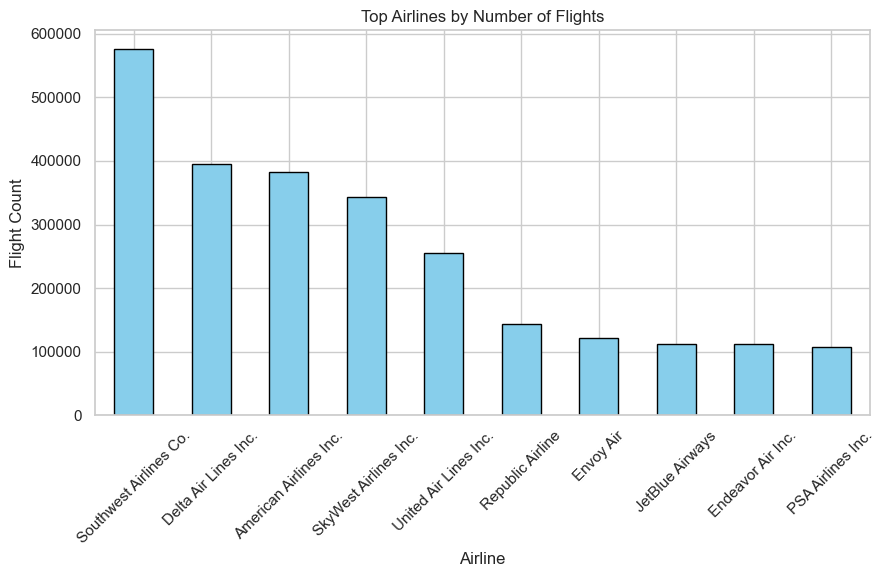

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set_theme(style="whitegrid")

# -----------------------------
# 1. Top Airlines by Flight Count
# -----------------------------
plt.figure(figsize=(10,5))
df['AIRLINE'].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top Airlines by Number of Flights")
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.xticks(rotation=45)
plt.show()


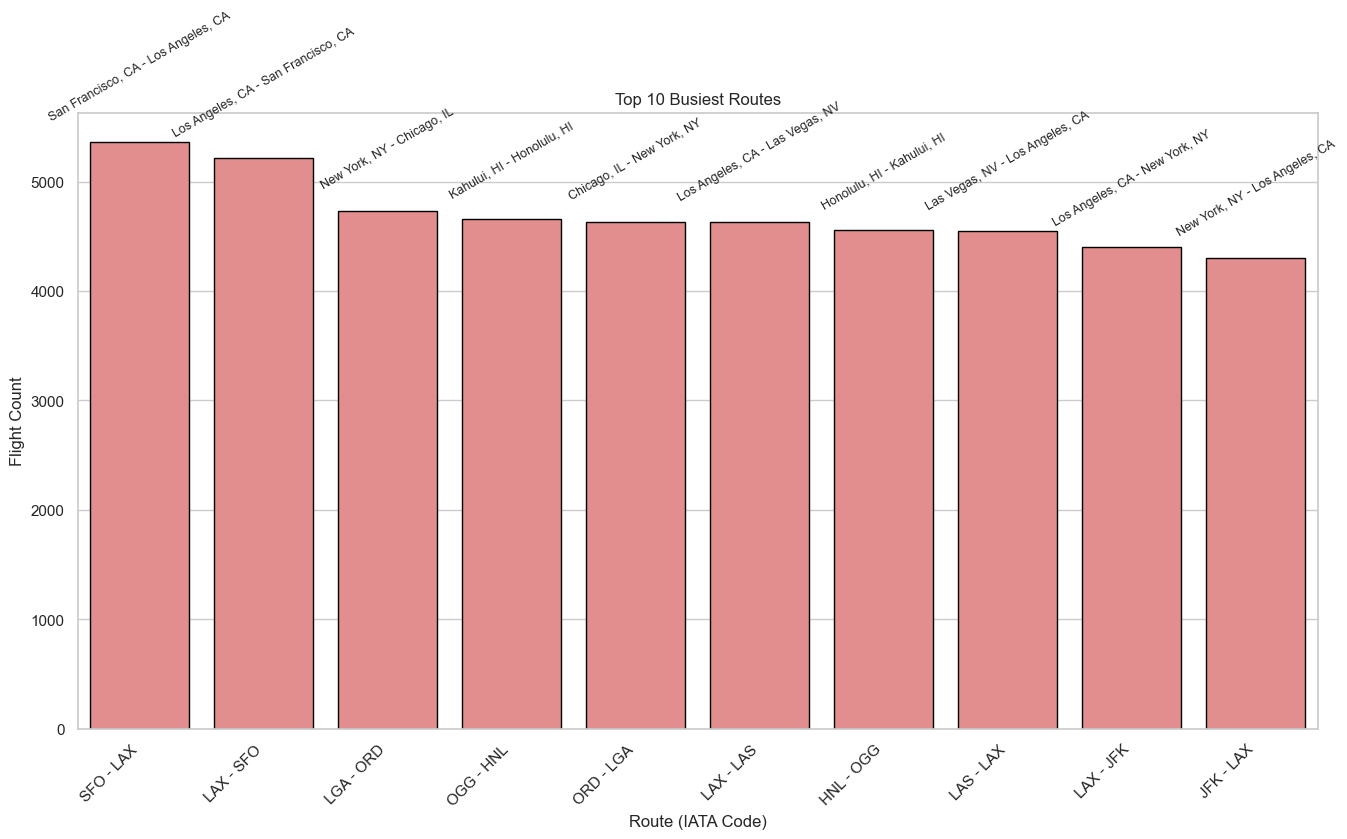

In [43]:
# -----------------------------
# 2. Top Routes by Flight Count
# -----------------------------
top_routes = df['ROUTE'].value_counts().head(10).reset_index()
top_routes.columns = ['ROUTE', 'Count']

# Merge with route-city mapping
route_map = df[['ROUTE','ROUTE_CITY']].drop_duplicates()
top_routes = top_routes.merge(route_map, on="ROUTE", how="left")

plt.figure(figsize=(16,8))
sns.barplot(data=top_routes, x="ROUTE", y="Count", color='lightcoral', edgecolor='black')
plt.title("Top 10 Busiest Routes")
plt.xlabel("Route (IATA Code)")
plt.ylabel("Flight Count")
plt.xticks(rotation=45, ha='right')

# Add route city names as annotation above each bar
for i, row in top_routes.iterrows():
    plt.text(i, row['Count']+200, row['ROUTE_CITY'], ha='center', fontsize=9, rotation=30)

plt.show()



C:\Users\sreek\AppData\Local\Temp\ipykernel_6376\739937861.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Month", order=df['Month'].value_counts().index, palette="viridis")


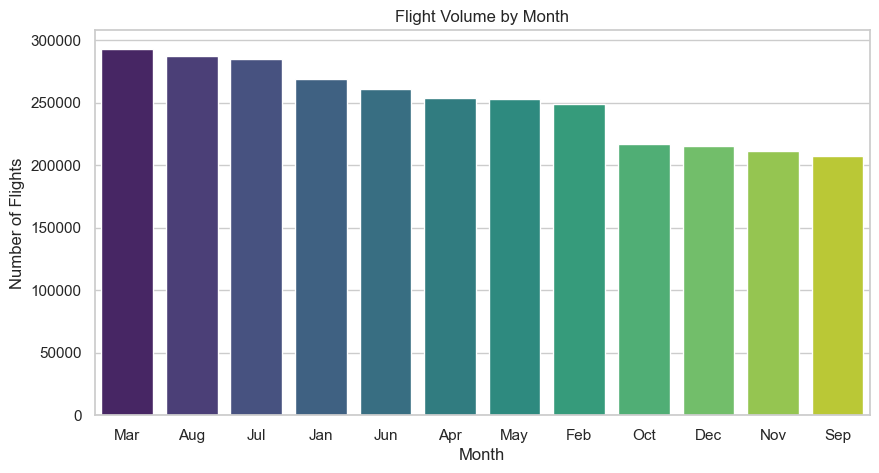

In [44]:
# -----------------------------
# 3. Busiest Months (Across Dataset)
# -----------------------------
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Month", order=df['Month'].value_counts().index, palette="viridis")
plt.title("Flight Volume by Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.show()

C:\Users\sreek\AppData\Local\Temp\ipykernel_6376\3670248020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DayOfWeek", order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette="pastel")


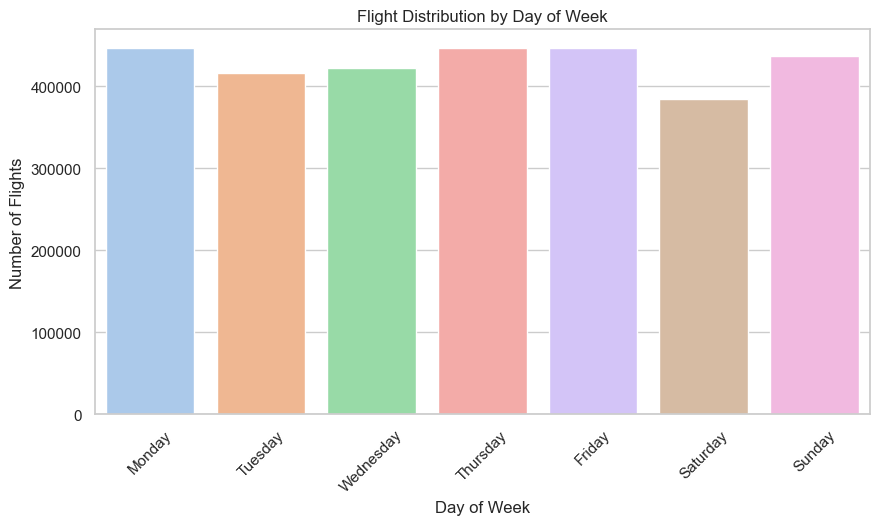

In [45]:
# -----------------------------
# 1. Flights by Day of Week
# -----------------------------
df['DayOfWeek'] = df['FL_DATE'].dt.day_name()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="DayOfWeek", order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette="pastel")
plt.title("Flight Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

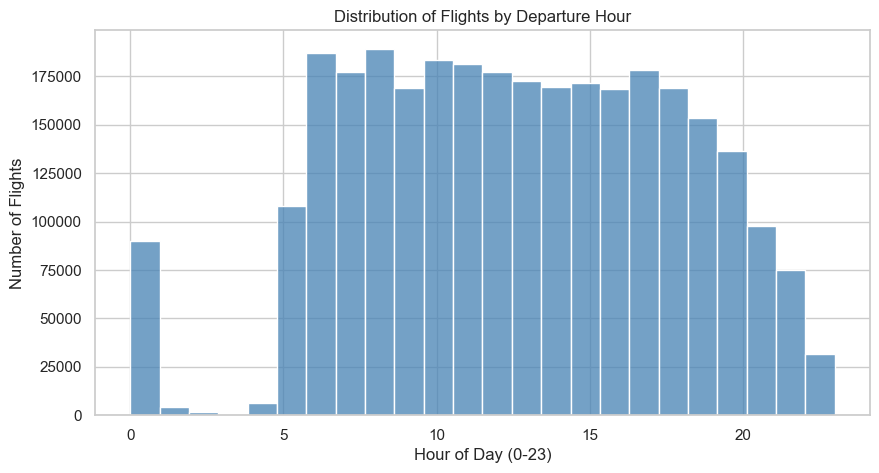

In [46]:
# -----------------------------
# Departure Time Distribution (Histogram)
df['DepHour'] = df['departure_time'].apply(lambda x: x.hour if pd.notnull(x) else None)

plt.figure(figsize=(10,5))
sns.histplot(df['DepHour'], bins=24, kde=False, color="steelblue")
plt.title("Distribution of Flights by Departure Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Flights")
plt.show()


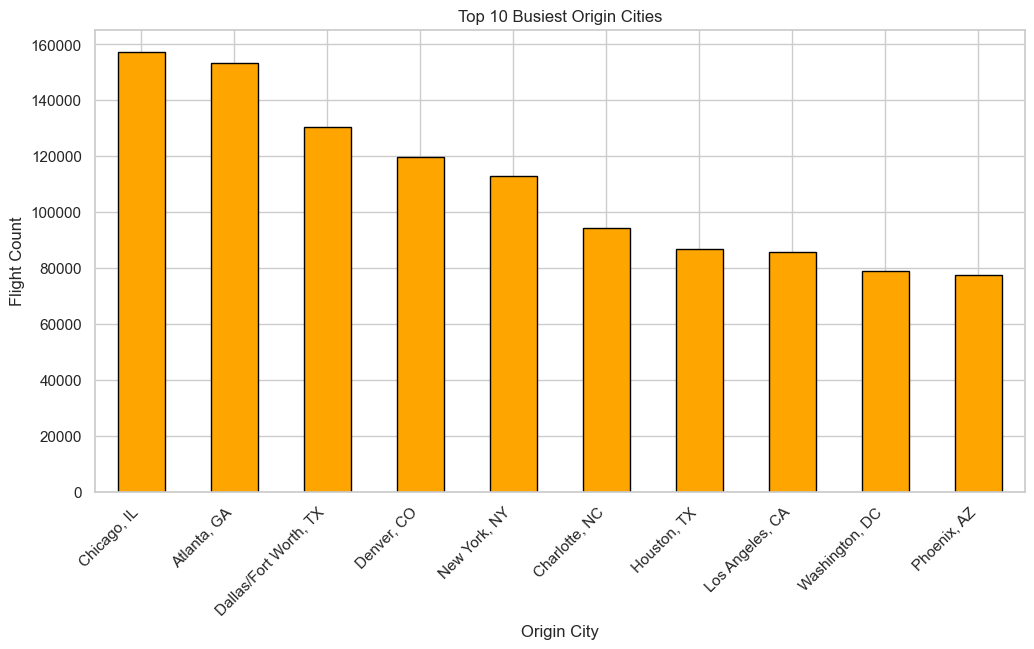

In [47]:
# -----------------------------
# 3. Flights by Origin City (Top 10)
# -----------------------------
plt.figure(figsize=(12,6))
df['ORIGIN_CITY'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Busiest Origin Cities")
plt.xlabel("Origin City")
plt.ylabel("Flight Count")
plt.xticks(rotation=45, ha='right')
plt.show()

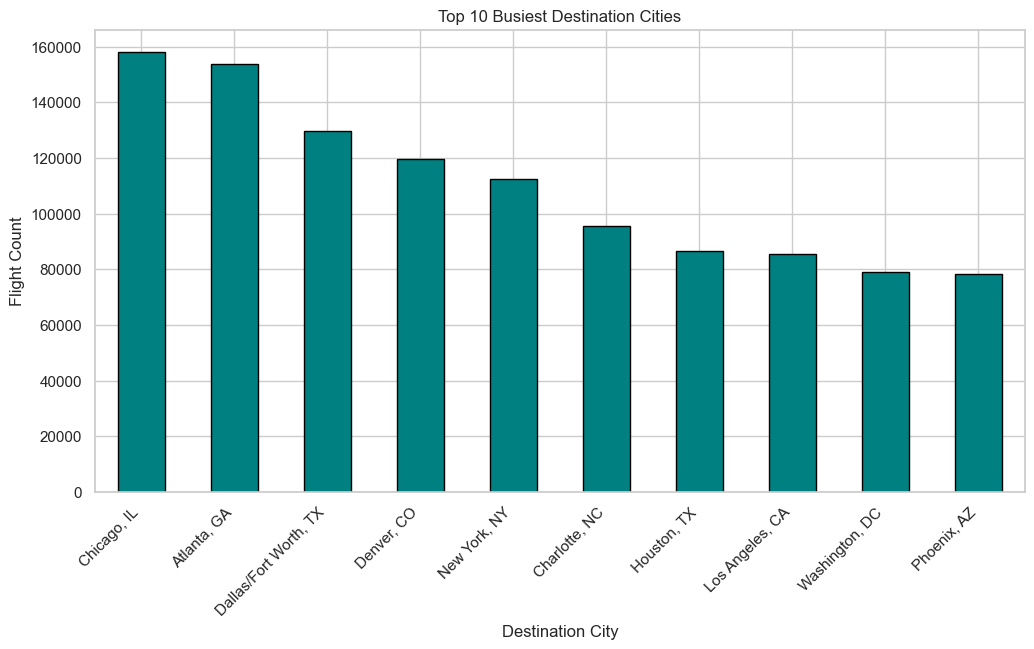

In [48]:
# -----------------------------
# 4. Flights by Destination City (Top 10)
# -----------------------------
plt.figure(figsize=(12,6))
df['DEST_CITY'].value_counts().head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 Busiest Destination Cities")
plt.xlabel("Destination City")
plt.ylabel("Flight Count")
plt.xticks(rotation=45, ha='right')
plt.show()


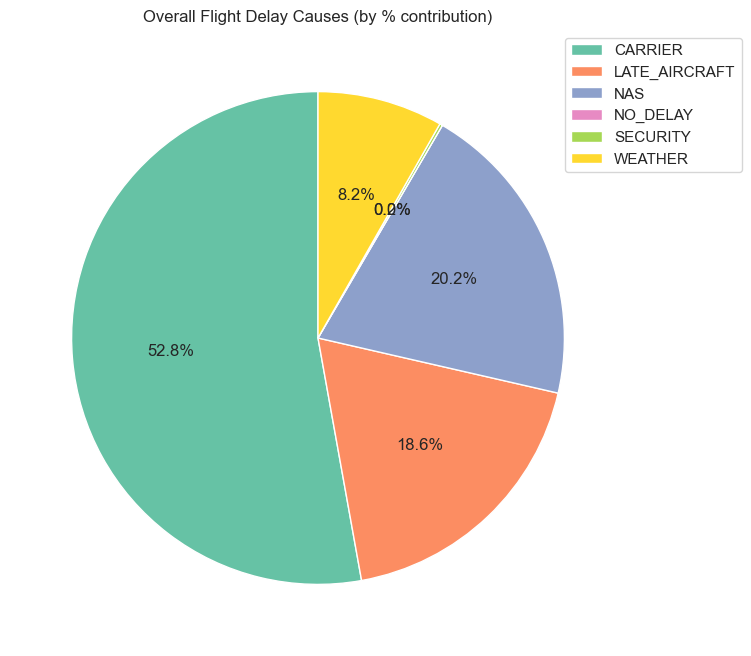

In [49]:
# -----------------------------
# 1. Overall Delay Causes (Pie Chart)
# -----------------------------
plt.figure(figsize=(8,8))
colors = sns.color_palette("Set2")

plt.pie(DELAY_CAUSE['DELAY_PERCENT'],
        labels=None,   # hide labels on slices
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)

plt.title("Overall Flight Delay Causes (by % contribution)")
plt.legend(DELAY_CAUSE['DELAY_CAUSE'], loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()


C:\Users\sreek\AppData\Local\Temp\ipykernel_6376\1780463777.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airline_delay = df.groupby(['AIRLINE','DELAY_CAUSE'])['DELAY_MINUTES'].sum().reset_index()


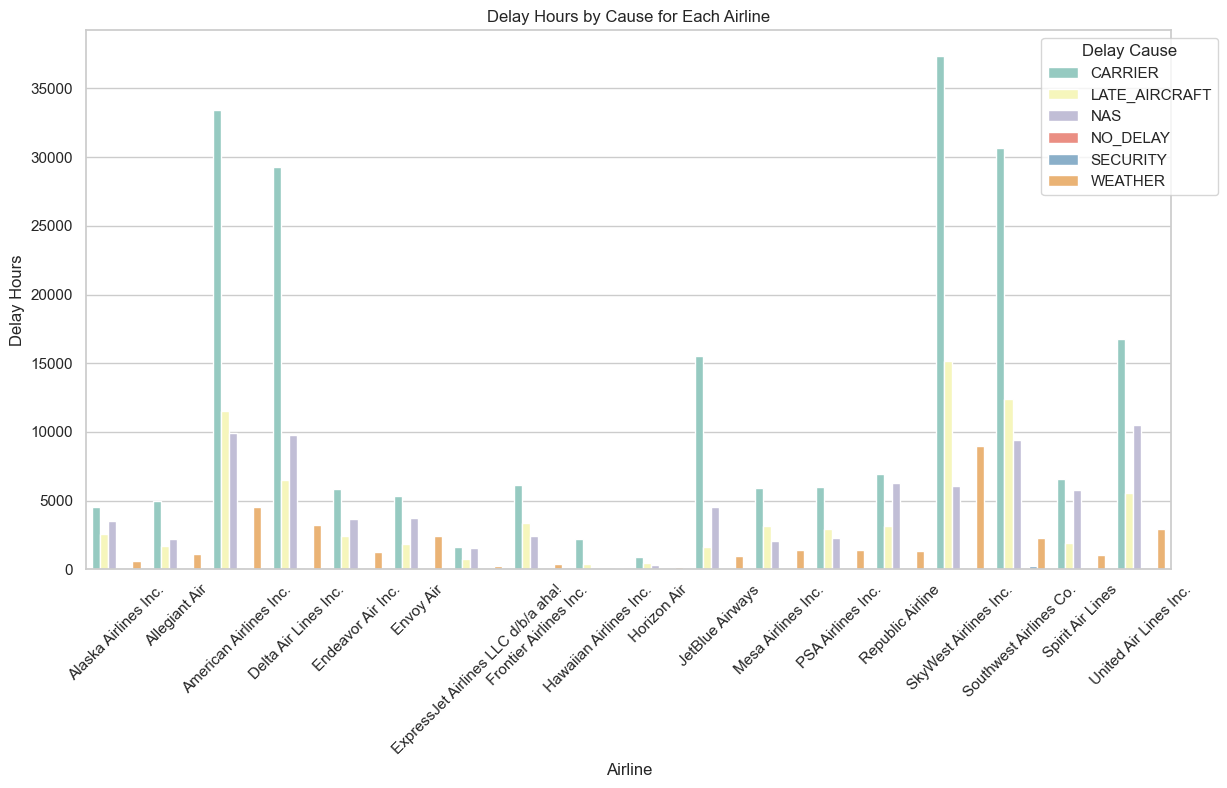

In [50]:
# -----------------------------
# 2. Delay Causes by Airline
# -----------------------------
airline_delay = df.groupby(['AIRLINE','DELAY_CAUSE'])['DELAY_MINUTES'].sum().reset_index()

# Convert minutes to hours for easier interpretation
airline_delay['DELAY_HOURS'] = airline_delay['DELAY_MINUTES'] / 60

plt.figure(figsize=(14,7))
sns.barplot(
    data=airline_delay,
    x="AIRLINE",
    y="DELAY_HOURS",
    hue="DELAY_CAUSE",
    palette="Set3"
)
plt.title("Delay Hours by Cause for Each Airline")
plt.xlabel("Airline")
plt.ylabel("Delay Hours")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05,1))
plt.xticks(rotation=45)
plt.show()


C:\Users\sreek\AppData\Local\Temp\ipykernel_6376\2855173771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="DepHour", y="DEP_DELAY", palette="coolwarm")


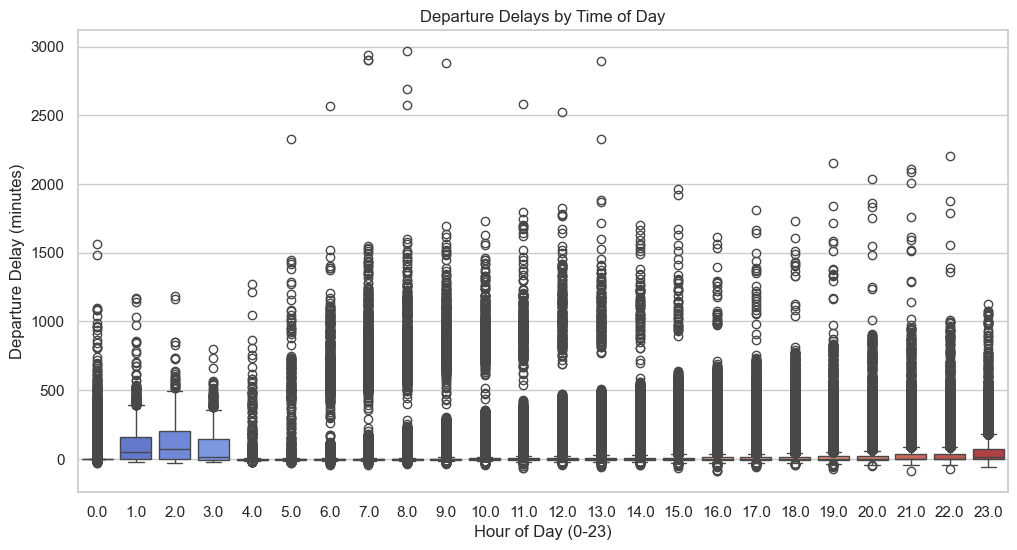

In [51]:
# -----------------------------
# 3. Delay Minutes by Departure Hour
# -----------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="DepHour", y="DEP_DELAY", palette="coolwarm")
plt.title("Departure Delays by Time of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Departure Delay (minutes)")
plt.show()


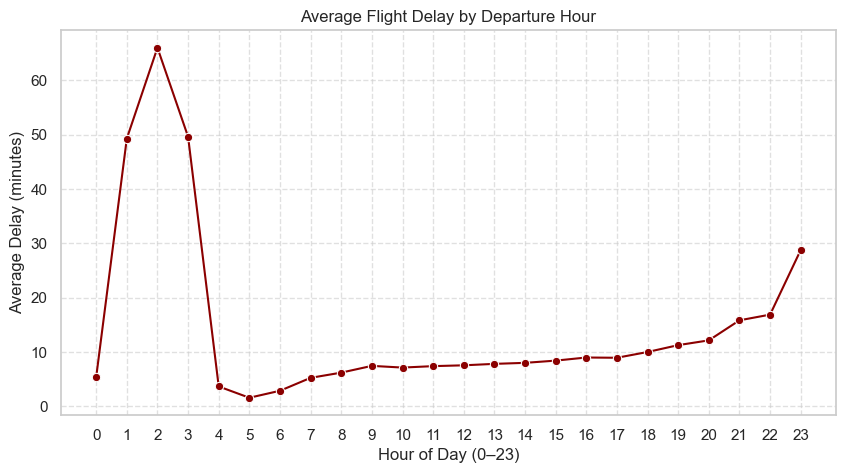

In [52]:
# Make sure DepHour is extracted properly from departure_time (which is already a time object)
df['DepHour'] = df['departure_time'].apply(lambda x: x.hour if pd.notnull(x) else None)

# Group: average delay by departure hour
hourly_delay = df.groupby('DepHour', dropna=True)['DELAY_MINUTES'].mean().reset_index()

# Line Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_delay, x='DepHour', y='DELAY_MINUTES', marker="o", color="darkred")
plt.title("Average Flight Delay by Departure Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(0,24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


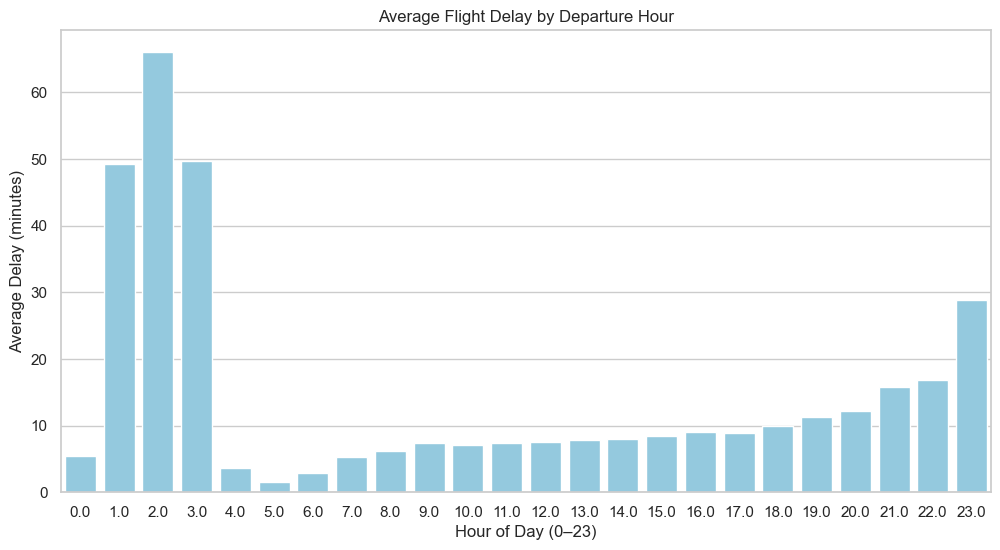

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(data=hourly_delay, x='DepHour', y='DELAY_MINUTES', color="skyblue")
plt.title("Average Flight Delay by Departure Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(0,24))
plt.show()


MIlestone 3

C:\Users\sreek\AppData\Local\Temp\ipykernel_6376\2177690604.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_od, x='Flights', y='ROUTE_CITY', palette='magma')


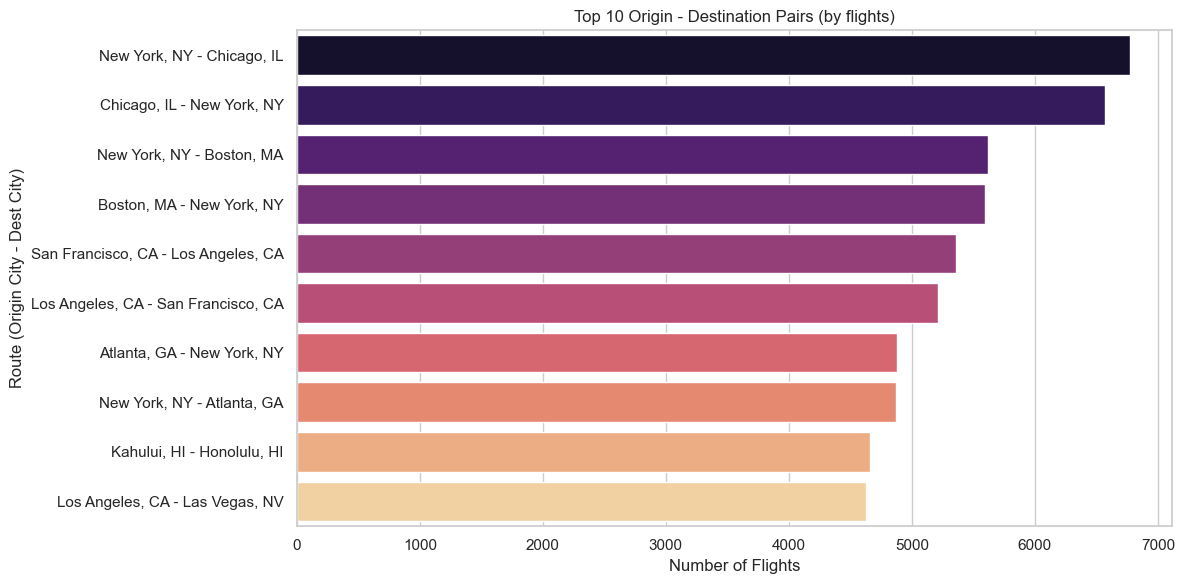

,ROUTE_CITY,Flights
0,"New York, NY - Chicago, IL",6775
1,"Chicago, IL - New York, NY",6572
2,"New York, NY - Boston, MA",5618
3,"Boston, MA - New York, NY",5591
4,"San Francisco, CA - Los Angeles, CA",5358
5,"Los Angeles, CA - San Francisco, CA",5212
6,"Atlanta, GA - New York, NY",4882
7,"New York, NY - Atlanta, GA",4872
8,"Kahului, HI - Honolulu, HI",4656
9,"Los Angeles, CA - Las Vegas, NV",4627


In [54]:
# Top 10 OD pairs by count (use ROUTE_CITY when available for readability)
top_od = df['ROUTE_CITY'].value_counts().head(10).reset_index()
top_od.columns = ['ROUTE_CITY', 'Flights']

plt.figure(figsize=(12,6))
sns.barplot(data=top_od, x='Flights', y='ROUTE_CITY', palette='magma')
plt.title('Top 10 Origin - Destination Pairs (by flights)')
plt.xlabel('Number of Flights')
plt.ylabel('Route (Origin City - Dest City)')
plt.tight_layout()
plt.show()

# Also print the table for clarity
top_od


C:\Users\sreek\AppData\Local\Temp\ipykernel_6376\1357056694.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df[df['ORIGIN_CITY'].isin(top_orig) & df['DEST_CITY'].isin(top_dest)].pivot_table(


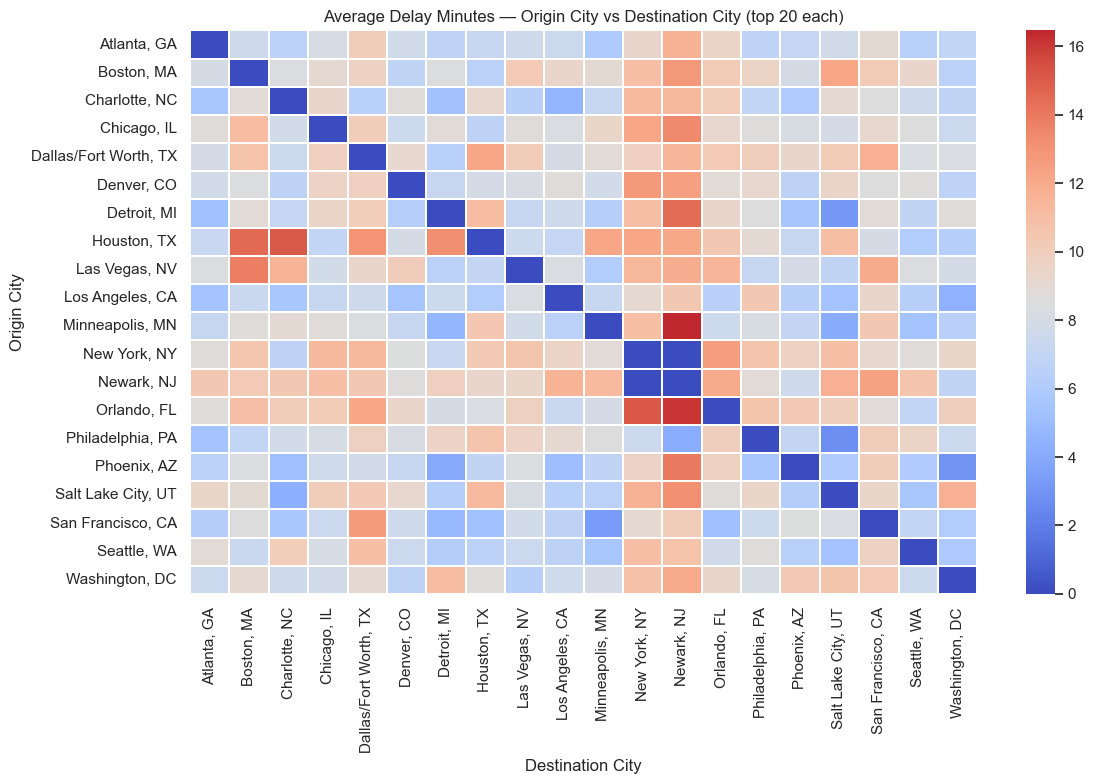

In [55]:
# Create pivot table of mean delay minutes by origin and destination (limit to top N to keep heatmap readable)
N = 20
top_orig = df['ORIGIN_CITY'].value_counts().head(N).index
top_dest = df['DEST_CITY'].value_counts().head(N).index

pivot = df[df['ORIGIN_CITY'].isin(top_orig) & df['DEST_CITY'].isin(top_dest)].pivot_table(
    index='ORIGIN_CITY', columns='DEST_CITY', values='DELAY_MINUTES', aggfunc='mean'
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot.fillna(0), cmap='coolwarm', center=pivot.stack().median(), linewidths=0.3)
plt.title(f'Average Delay Minutes — Origin City vs Destination City (top {N} each)')
plt.xlabel('Destination City')
plt.ylabel('Origin City')
plt.tight_layout()
plt.show()


C:\Users\sreek\AppData\Local\Temp\ipykernel_6376\1729615857.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DELAY_MINUTES', y='RouteLabel', data=route_delay, palette='rocket')


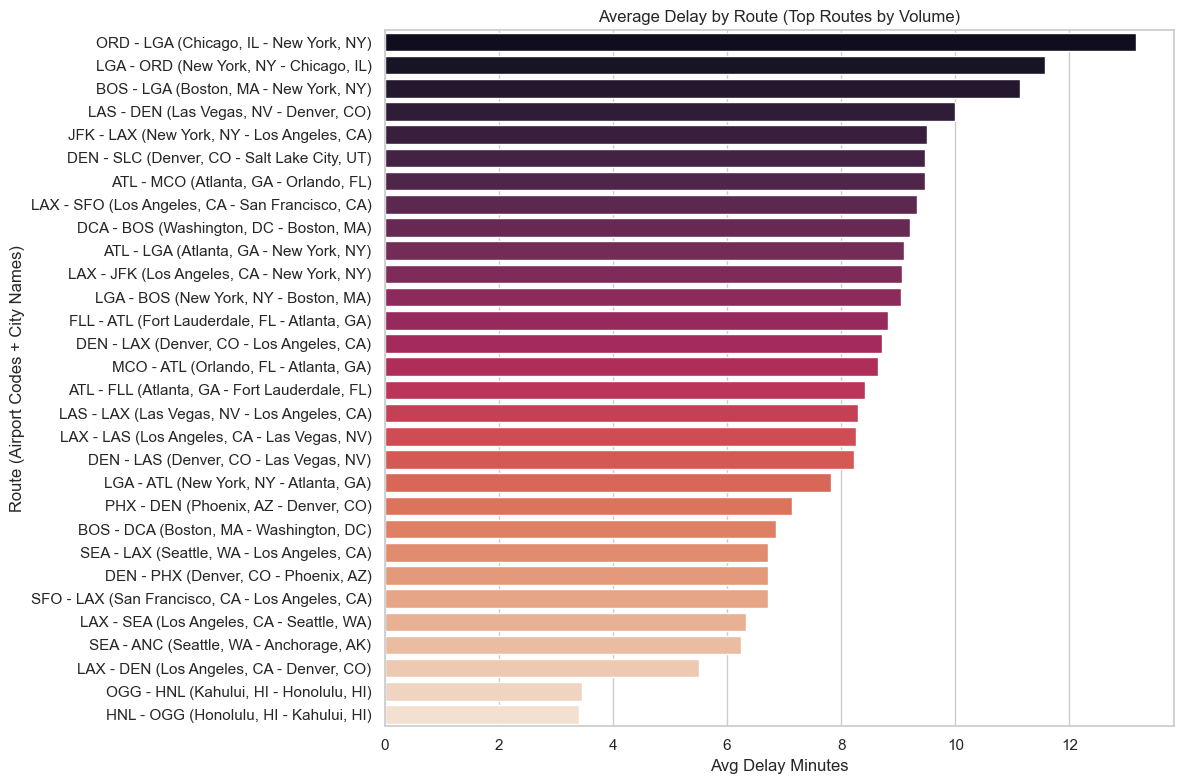

,ROUTE,ROUTE_CITY,DELAY_MINUTES,RouteLabel
25,ORD - LGA,"Chicago, IL - New York, NY",13.172853,"ORD - LGA (Chicago, IL - New York, NY)"
22,LGA - ORD,"New York, NY - Chicago, IL",11.578036,"LGA - ORD (New York, NY - Chicago, IL)"
4,BOS - LGA,"Boston, MA - New York, NY",11.131733,"BOS - LGA (Boston, MA - New York, NY)"
13,LAS - DEN,"Las Vegas, NV - Denver, CO",9.997901,"LAS - DEN (Las Vegas, NV - Denver, CO)"
12,JFK - LAX,"New York, NY - Los Angeles, CA",9.502207,"JFK - LAX (New York, NY - Los Angeles, CA)"


In [56]:
# Average delay for exact ROUTE (airport codes) - show top 30 routes
top_routes = df['ROUTE'].value_counts().head(30).index
route_delay = df[df['ROUTE'].isin(top_routes)].groupby('ROUTE')['DELAY_MINUTES'].mean().sort_values(ascending=False)

# Take top 30 busiest routes
top_routes = df['ROUTE'].value_counts().head(30).index

# Compute avg delay
route_delay = (
    df[df['ROUTE'].isin(top_routes)]
    .groupby(['ROUTE','ROUTE_CITY'])['DELAY_MINUTES']
    .mean()
    .reset_index()
    .sort_values('DELAY_MINUTES', ascending=False)
)

# Merge city info into a single label
route_delay['RouteLabel'] = route_delay['ROUTE'] + " (" + route_delay['ROUTE_CITY'] + ")"

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x='DELAY_MINUTES', y='RouteLabel', data=route_delay, palette='rocket')
plt.xlabel('Avg Delay Minutes')
plt.ylabel('Route (Airport Codes + City Names)')
plt.title('Average Delay by Route (Top Routes by Volume)')
plt.tight_layout()
plt.show()

# Show sample table
route_delay.head()

